### COLOR THRESHOLDING

Color thresholding is a technique to filter out a specific range of colors in an image by defining upper and lower bounds in a color space. We use it to segment, replace or isolate specific colors in an image.

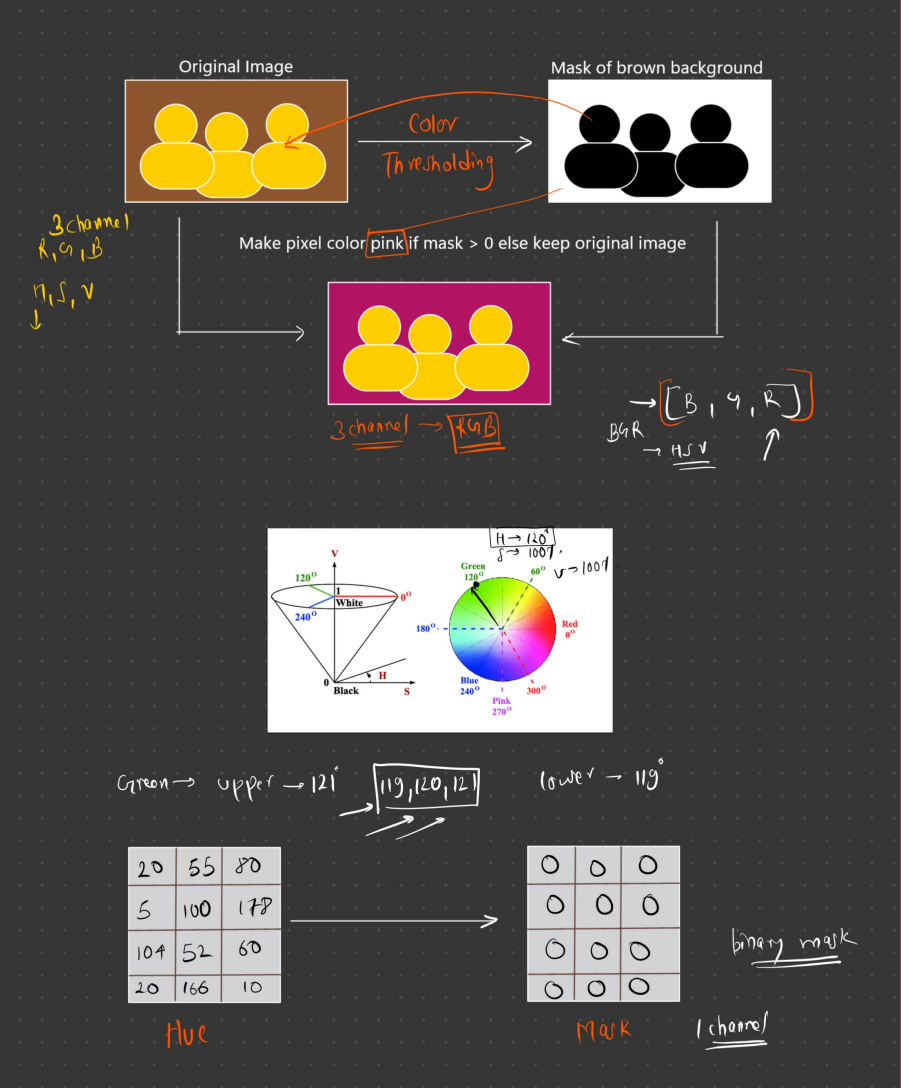

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('./giraffe-Kenya.png')

In [3]:
image

array([[[237, 197, 135],
        [240, 199, 137],
        [240, 199, 137],
        ...,
        [225, 183, 119],
        [225, 183, 119],
        [225, 183, 119]],

       [[231, 191, 129],
        [228, 187, 126],
        [228, 187, 126],
        ...,
        [228, 185, 122],
        [228, 185, 122],
        [228, 185, 122]],

       [[241, 200, 138],
        [229, 188, 127],
        [229, 188, 127],
        ...,
        [225, 182, 121],
        [225, 183, 119],
        [225, 183, 119]],

       ...,

       [[120, 188, 223],
        [119, 187, 222],
        [113, 181, 216],
        ...,
        [ 61,  90, 131],
        [ 77, 104, 145],
        [ 87, 114, 155]],

       [[123, 191, 225],
        [130, 198, 232],
        [124, 192, 226],
        ...,
        [ 53,  85, 125],
        [ 72, 102, 143],
        [ 87, 117, 158]],

       [[110, 178, 212],
        [123, 191, 225],
        [117, 185, 219],
        ...,
        [ 49,  81, 122],
        [ 69, 101, 141],
        [ 87, 118, 159]]

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

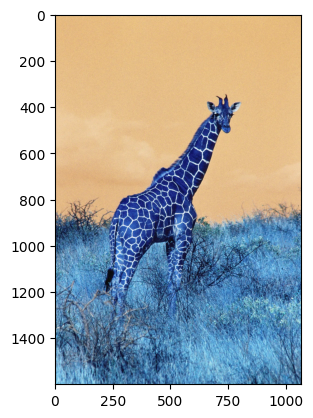

In [20]:
plt.imshow(image)

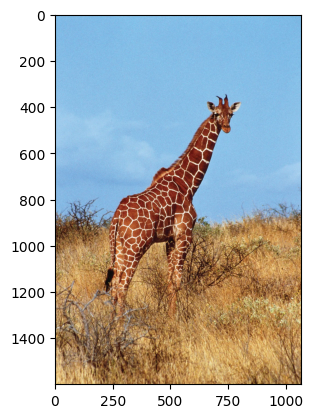

In [5]:
plt.imshow(image_rgb)

In [7]:
# To change the white line of giraffe to black color

# Fix the lower and upper bound

lower_bound = np.array([0,0,190])
upper_bound = np.array([30,80,255])

In [8]:
# Create a mask
mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

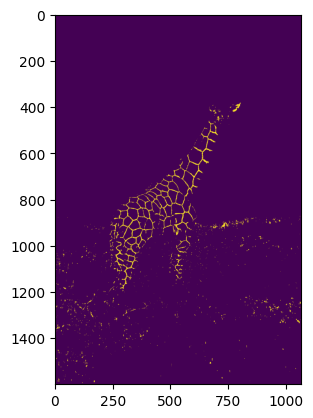

In [9]:
plt.imshow(mask)

In [12]:
black_line_hsv = np.uint8([[[120,225,0]]])
black_line_bgr = cv2.cvtColor(black_line_hsv, cv2.COLOR_HSV2BGR)[0][0]

In [13]:
result_image = image.copy()
result_image[mask > 0] = black_line_bgr

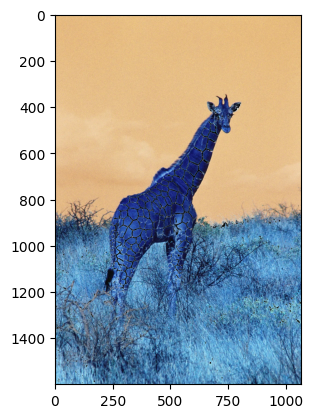

In [15]:
plt.imshow(result_image)

In [16]:
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

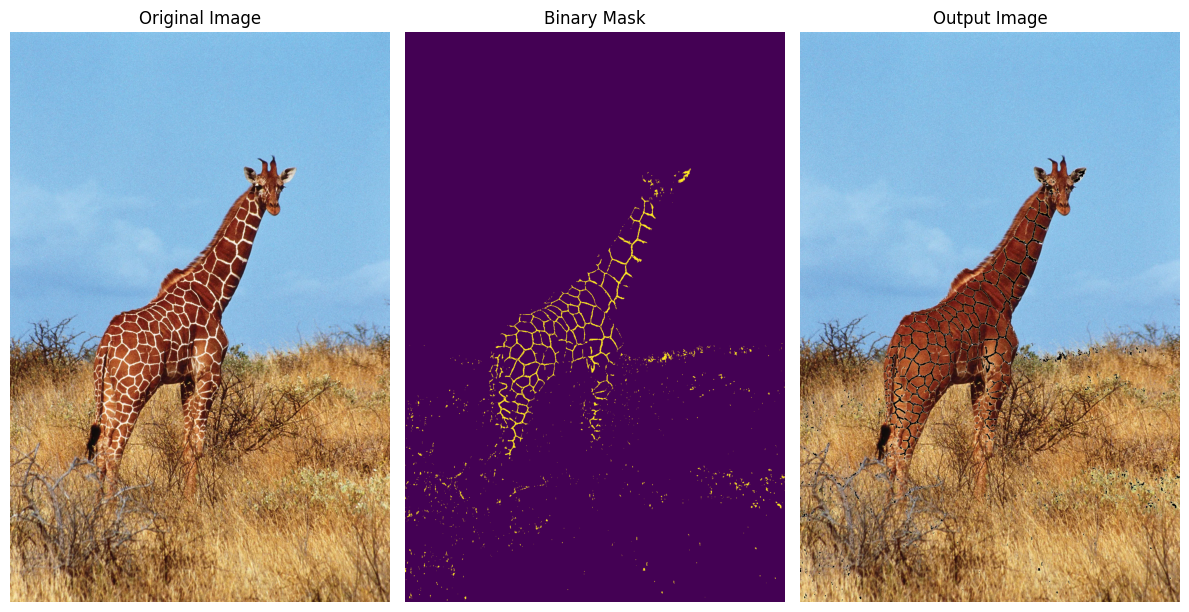

In [19]:
# Plot

fig, axis = plt.subplots(1, 3, figsize=(12,6))

axis[0].imshow(image_rgb)
axis[0].set_title("Original Image")
axis[0].axis('off')

axis[1].imshow(mask)
axis[1].set_title("Binary Mask")
axis[1].axis('off')


axis[2].imshow(result_image_rgb)
axis[2].set_title("Output Image")
axis[2].axis('off')

plt.tight_layout()
plt.show()
